# Деревья решений

Цель работы - обучить модель машинного обучения классифицировать людей на мужчин и женщин по их голосу. Системе идентификации пола по голосу, основанной на такой модели, можно найти применение во многих областях — от маркетинга до интегрирования в системы безопасности.

Датасет взят с *Kaggle*.

Набор данных состоит из 3 168 записанных образцов голоса мужчин и женщин. Образцы предварительно обрабатываются с помощью акустического анализа на языке программирования R с использованием специальных библиотек в диапазоне частот 0 Гц-280 Гц (диапазон человеческого голоса). Если вкратце, в результате обработки звук на аудиозаписи оцифровывается и преобразуется в числовую последовательность частот, из которой извлекаются различные статистические характеристики, например средняя частота, с которой говорит спикер на аудиозаписи, или частота с наибольшей энергией и так далее.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

## Читаем данные

In [36]:
voice_data = pd.read_csv('data/voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Целевая переменная - *label*

In [37]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Bсе признаки, за исключением целевого, кодируются числовым форматом. Типизация целевой переменной не имеет значения для моделей машинного обучения в библиотеке **sklearn**, поэтому кодирование категориальных признаков нам не потребуется.

In [38]:
voice_data.isnull().sum().sum()

0

Пропусков в датасете нет.

Дополнительная предобработка данных нам не потребуется, поэтому мы можем перейти к построению моделей. Для моделирования будем использовать модели «древесного» типа.

In [39]:
X = voice_data.drop("label", axis=1)
y = voice_data["label"]

In [40]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


## Начнём с решающего пня

Создим модель дерева решений максимальной глубины 1. В качестве критерия информативности используем энтропию Шеннона.

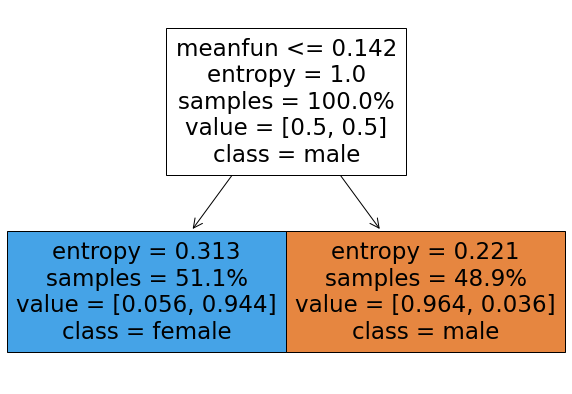

In [41]:
dstump = tree.DecisionTreeClassifier(max_depth=1, criterion="entropy", random_state=0)
dstump.fit(X_train, y_train)

fig = plt.figure(figsize=(10, 7))

tree_graph = tree.plot_tree(
    dstump,
    feature_names=X.columns, 
    proportion=True, 
    filled=True, 
    class_names=list(y.unique())
)

На основе ***meanfun*** будет построено решающее правило в корневой вершине, оптимальное пороговое решение ***0.142***.

In [42]:
y_test_pred = dstump.predict(X_test)
print("Accuracy score on test data is {:.3f}".format(metrics.accuracy_score(y_test, y_test_pred))) 

Accuracy score on test data is 0.956


51.1% наблюдений, для которых выполняется заданное в корневой вершине условие, содержится в обучающей выборке. 

Увеличим глубину дерева.

Создадим дерево решений с максимальной глубиной 2. 

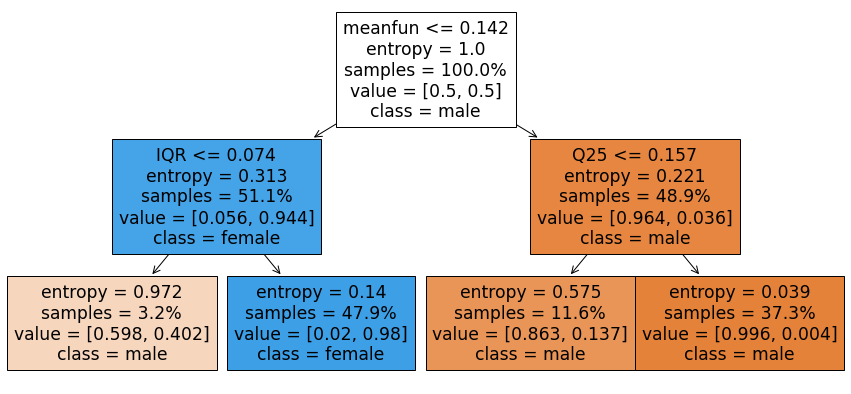

In [43]:
dtree = tree.DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=0)
dtree.fit(X_train, y_train)

fig = plt.figure(figsize=(15, 7))

tree_graph = tree.plot_tree(
    dtree,
    feature_names=X.columns, 
    proportion=True, 
    filled=True, 
    class_names=list(y.unique())
)

In [44]:
y_test_pred = dtree.predict(X_test)
print("Accuracy score on test data is {:.3f}".format(metrics.accuracy_score(y_test, y_test_pred))) 

Accuracy score on test data is 0.962


Один лист в построенном дереве содержит в качестве предсказания класс **female**.

## Дадим дереву решений "полную свободу".

Создим дерево решений, не ограничивая его максимальную глубину.

In [46]:
free_dtree = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
free_dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
free_dtree.get_depth()

12

Глубина полученного дерева решения: **12**

In [49]:
free_dtree.get_n_leaves()

54

Количество листьев в полученном дереве решений: 54

Метрика ***accuracy*** на тестовом и обучающем наборах: 

In [50]:
print("Accuracy score on train data is {:.3f}".format(metrics.accuracy_score(y_train, free_dtree.predict(X_train)))) 
print("Accuracy score on test data is {:.3f}".format(metrics.accuracy_score(y_test, free_dtree.predict(X_test)))) 

Accuracy score on train data is 1.000
Accuracy score on test data is 0.973


На лицо - переобучение.

## Найдём оптимальные внешние параметры модели дерева решений 
Воспользуемся классическим методом подбора гиперпараметров — перебором на сетке с кросс-валидацией (Grid SearchCV).

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [3, 4, 5, 10] 
}

grid_search = GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=0),
                           param_grid=param_grid,
                           cv=model_selection.StratifiedKFold(n_splits=5),
                           scoring="accuracy",
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Наилучшие значения параметров:{grid_search.best_params_}")

Наилучшие значения параметров:{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}


In [59]:
best_dtree = tree.DecisionTreeClassifier(max_depth=7, min_samples_split=3, criterion="gini", random_state=0)
best_dtree.fit(X_train, y_train)

y_train_pred = best_dtree.predict(X_train)
y_test_pred = best_dtree.predict(X_test)

print("Accuracy score on train data is {:.3f}".format(metrics.accuracy_score(y_train, y_train_pred))) 
print("Accuracy score on test data is {:.3f}".format(metrics.accuracy_score(y_test, y_test_pred)))

Accuracy score on train data is 0.996
Accuracy score on test data is 0.970


Построена оптимальная модель с максимальной глубиной **7**, с оптимальным минимальным количеством объектов, необходимых для разбиения **3**, с критерием информативности **Джинни**.

Для оптимального дерева решений, построенного в задании 7.4, найдите важность каждого из факторов. Визуализируйте её в виде столбчатой диаграммы.


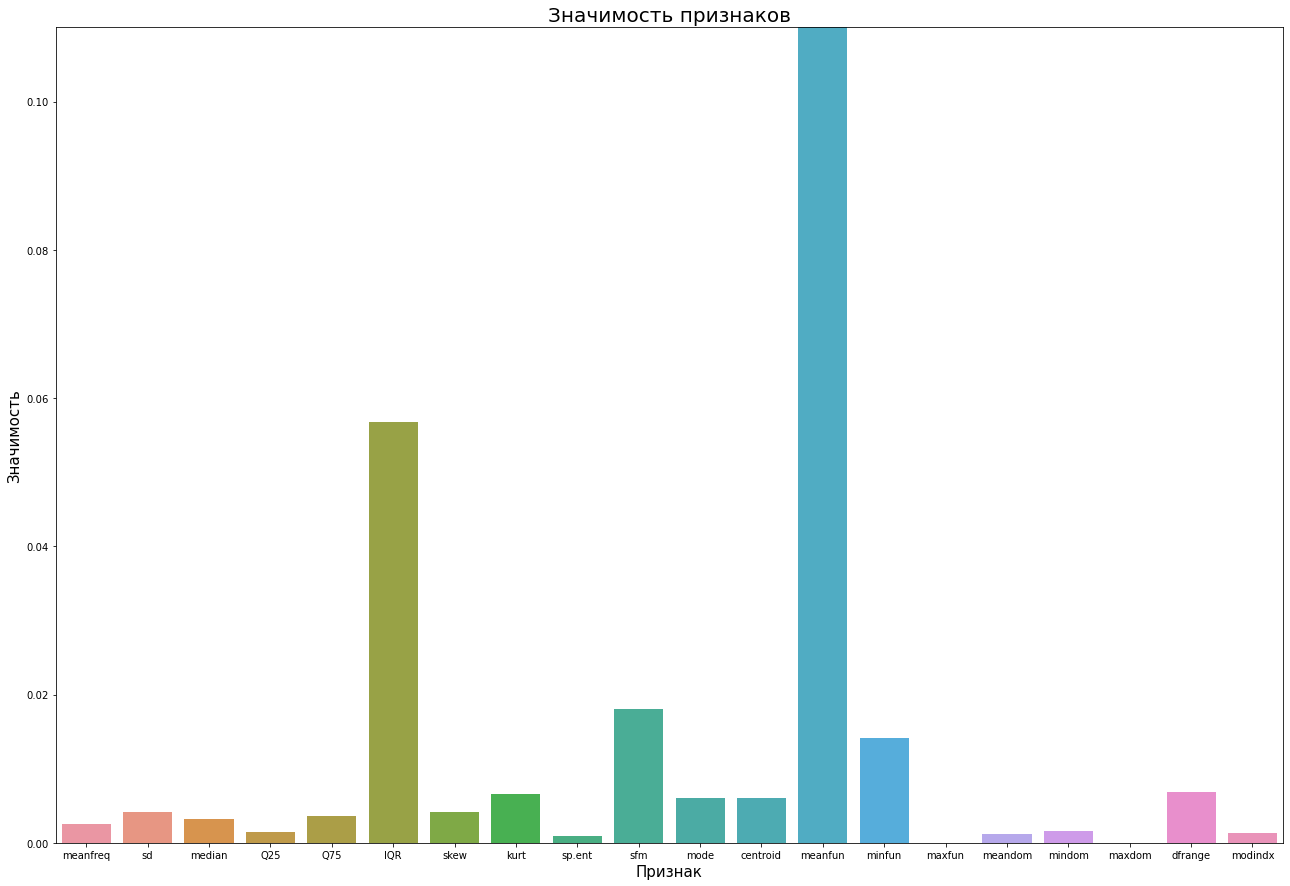

In [90]:
fig, ax = plt.subplots(figsize=(22, 15))

sns.barplot(x=X_train.columns, y=best_dtree.feature_importances_, ax=ax)

ax.set_title("Значимость признаков", fontsize=20)
ax.set_xlabel("Признак", fontsize=15)
ax.set_ylabel("Значимость", fontsize=15)
ax.set_ylim(top=0.11); #для наглядности

In [91]:
print("Значимость признака 'meanfun': {:.3f}".format(np.max(best_dtree.feature_importances_)))

Значимость признака 'meanfun': 0.861
